In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/product-prices-and-sizes-from-walmart-grocery/WMT_Grocery_202209.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("/kaggle/input/product-prices-and-sizes-from-walmart-grocery/WMT_Grocery_202209.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df

,index,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,PROMOTION,RunDate,tid
0,0,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",110895339,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Red Pepper Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163804
1,1,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",105455228,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Garlic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163805
2,2,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",128642379,https://www.walmart.com/ip/Marketside-Classic-...,"Marketside Classic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163806
3,3,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",366126367,https://www.walmart.com/ip/Marketside-Everythi...,"Marketside Everything Hummus, 10 oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163807
4,4,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",160090316,https://www.walmart.com/ip/Price-s-Jalapeno-Di...,"Price's Jalapeno Dip, 12 Oz.",Price's,3.12,3.12,12,NaN,2022-09-11 21:20:04,16163808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568529,568529,70072,Alcohol,Wine,White Wine,Alcohol/Wine,593600139,https://www.walmart.com/ip/Farm-Fresh-Blueberr...,Farm Fresh Blueberry Moscato 750ml,Farm Fresh Wine Company,9.98,9.98,750,NaN,2022-09-11 21:20:04,16732333
568530,568530,70072,Alcohol,Wine,White Wine,Alcohol/Wine,333403243,https://www.walmart.com/ip/Farm-Fresh-Peach-Mo...,Farm Fresh Peach Moscato 750 Ml,Farm Fresh Wine Company,9.98,9.98,750,NaN,2022-09-11 21:20:04,16732334
568531,568531,70072,Alcohol,Wine,White Wine,Alcohol/Wine,526588325,https://www.walmart.com/ip/Farm-Fresh-Raspberr...,Farm Fresh Raspberry Moscato 750ml,Farm Fresh Wine Company,9.98,9.98,750,NaN,2022-09-11 21:20:04,16732335
568532,568532,70072,Alcohol,Wine,White Wine,Alcohol/Wine,286992782,https://www.walmart.com/ip/Farm-Fresh-Mango-Mo...,Farm Fresh Mango Moscato 750ml,Farm Fresh Wine Company,9.98,9.98,750,NaN,2022-09-11 21:20:04,16732336


In [5]:
df.head(3)

,index,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,PROMOTION,RunDate,tid
0,0,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",110895339,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Red Pepper Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163804
1,1,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",105455228,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Garlic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163805
2,2,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",128642379,https://www.walmart.com/ip/Marketside-Classic-...,"Marketside Classic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163806


In [6]:
df.drop('index',axis=1,inplace=True)

In [7]:
df.shape

(568534, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568534 entries, 0 to 568533
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SHIPPING_LOCATION  568534 non-null  int64  
 1   DEPARTMENT         568534 non-null  object 
 2   CATEGORY           568534 non-null  object 
 3   SUBCATEGORY        361324 non-null  object 
 4   BREADCRUMBS        568534 non-null  object 
 5   SKU                568534 non-null  int64  
 6   PRODUCT_URL        568534 non-null  object 
 7   PRODUCT_NAME       568534 non-null  object 
 8   BRAND              568507 non-null  object 
 9   PRICE_RETAIL       568534 non-null  float64
 10  PRICE_CURRENT      568534 non-null  float64
 11  PRODUCT_SIZE       505709 non-null  object 
 12  PROMOTION          0 non-null       float64
 13  RunDate            568534 non-null  object 
 14  tid                568534 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 65

In [9]:
df["PRODUCT_SIZE"]=pd.to_numeric(df[ "PRODUCT_SIZE"  ],errors='coerce') 

In [10]:
def null_values(df):
    null_values=pd.DataFrame({  "Null Values":df.isnull().sum()} )
    null_values=null_values.reset_index()
    print(null_values)

In [11]:
null_values(df)

                index  Null Values
0   SHIPPING_LOCATION            0
1          DEPARTMENT            0
2            CATEGORY            0
3         SUBCATEGORY       207210
4         BREADCRUMBS            0
5                 SKU            0
6         PRODUCT_URL            0
7        PRODUCT_NAME            0
8               BRAND           27
9        PRICE_RETAIL            0
10      PRICE_CURRENT            0
11       PRODUCT_SIZE        63560
12          PROMOTION       568534
13            RunDate            0
14                tid            0


In [12]:
df.describe()

,SHIPPING_LOCATION,SKU,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,PROMOTION,tid
count,568534.000000,5.685340e+05,568534.000000,568534.000000,504974.000000,0.0,5.685340e+05
mean,57713.149935,2.453284e+08,5.105377,5.079274,24.184679,NaN,1.644807e+07
std,24113.969156,3.049375e+08,4.824906,4.727971,78.654004,NaN,1.641218e+05
min,6010.000000,8.795550e+05,0.160000,0.160000,0.030000,NaN,1.616380e+07
25%,33647.000000,1.555602e+07,2.480000,2.480000,6.000000,NaN,1.630594e+07
50%,63376.000000,5.003978e+07,3.880000,3.880000,12.000000,NaN,1.644807e+07
75%,77449.000000,4.448820e+08,5.980000,5.980000,18.260000,NaN,1.659020e+07
max,96797.000000,1.996767e+09,246.870000,246.870000,5000.000000,NaN,1.673234e+07


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.drop(labels='PROMOTION' , axis=1, inplace=True)

In [15]:
null_values(df)

                index  Null Values
0   SHIPPING_LOCATION            0
1          DEPARTMENT            0
2            CATEGORY            0
3         SUBCATEGORY       207210
4         BREADCRUMBS            0
5                 SKU            0
6         PRODUCT_URL            0
7        PRODUCT_NAME            0
8               BRAND           27
9        PRICE_RETAIL            0
10      PRICE_CURRENT            0
11       PRODUCT_SIZE        63560
12            RunDate            0
13                tid            0


In [16]:
df.shape

(568534, 14)

In [17]:
 cate_columns=df.select_dtypes(include=['category','object'])
cate_columns

,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,PRODUCT_URL,PRODUCT_NAME,BRAND,RunDate
0,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Red Pepper Hummus, 10 Oz",Marketside,2022-09-11 21:20:04
1,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Garlic Hummus, 10 Oz",Marketside,2022-09-11 21:20:04
2,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",https://www.walmart.com/ip/Marketside-Classic-...,"Marketside Classic Hummus, 10 Oz",Marketside,2022-09-11 21:20:04
3,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",https://www.walmart.com/ip/Marketside-Everythi...,"Marketside Everything Hummus, 10 oz",Marketside,2022-09-11 21:20:04
4,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",https://www.walmart.com/ip/Price-s-Jalapeno-Di...,"Price's Jalapeno Dip, 12 Oz.",Price's,2022-09-11 21:20:04
...,...,...,...,...,...,...,...,...
568529,Alcohol,Wine,White Wine,Alcohol/Wine,https://www.walmart.com/ip/Farm-Fresh-Blueberr...,Farm Fresh Blueberry Moscato 750ml,Farm Fresh Wine Company,2022-09-11 21:20:04
568530,Alcohol,Wine,White Wine,Alcohol/Wine,https://www.walmart.com/ip/Farm-Fresh-Peach-Mo...,Farm Fresh Peach Moscato 750 Ml,Farm Fresh Wine Company,2022-09-11 21:20:04
568531,Alcohol,Wine,White Wine,Alcohol/Wine,https://www.walmart.com/ip/Farm-Fresh-Raspberr...,Farm Fresh Raspberry Moscato 750ml,Farm Fresh Wine Company,2022-09-11 21:20:04
568532,Alcohol,Wine,White Wine,Alcohol/Wine,https://www.walmart.com/ip/Farm-Fresh-Mango-Mo...,Farm Fresh Mango Moscato 750ml,Farm Fresh Wine Company,2022-09-11 21:20:04


In [18]:
numeric_columns=df.select_dtypes(include=['int','float'])
numeric_columns

,SHIPPING_LOCATION,SKU,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,tid
0,79936,110895339,2.67,2.67,10.0,16163804
1,79936,105455228,2.67,2.67,10.0,16163805
2,79936,128642379,2.67,2.67,10.0,16163806
3,79936,366126367,2.67,2.67,10.0,16163807
4,79936,160090316,3.12,3.12,12.0,16163808
...,...,...,...,...,...,...
568529,70072,593600139,9.98,9.98,750.0,16732333
568530,70072,333403243,9.98,9.98,750.0,16732334
568531,70072,526588325,9.98,9.98,750.0,16732335
568532,70072,286992782,9.98,9.98,750.0,16732336


In [19]:
def draw_boxplot(df):
    for column  in df.columns:
        if type(column ) not in ['object','str' ]:
            
            plt.boxplot( df[column ])
            plt.show()
            
            

In [20]:
def draw_hist(df):
    for columns in df.columns:
        if type(columns) not in ['object','str' ]:
            plt.hist(df[columns])
            plt.show()
    

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

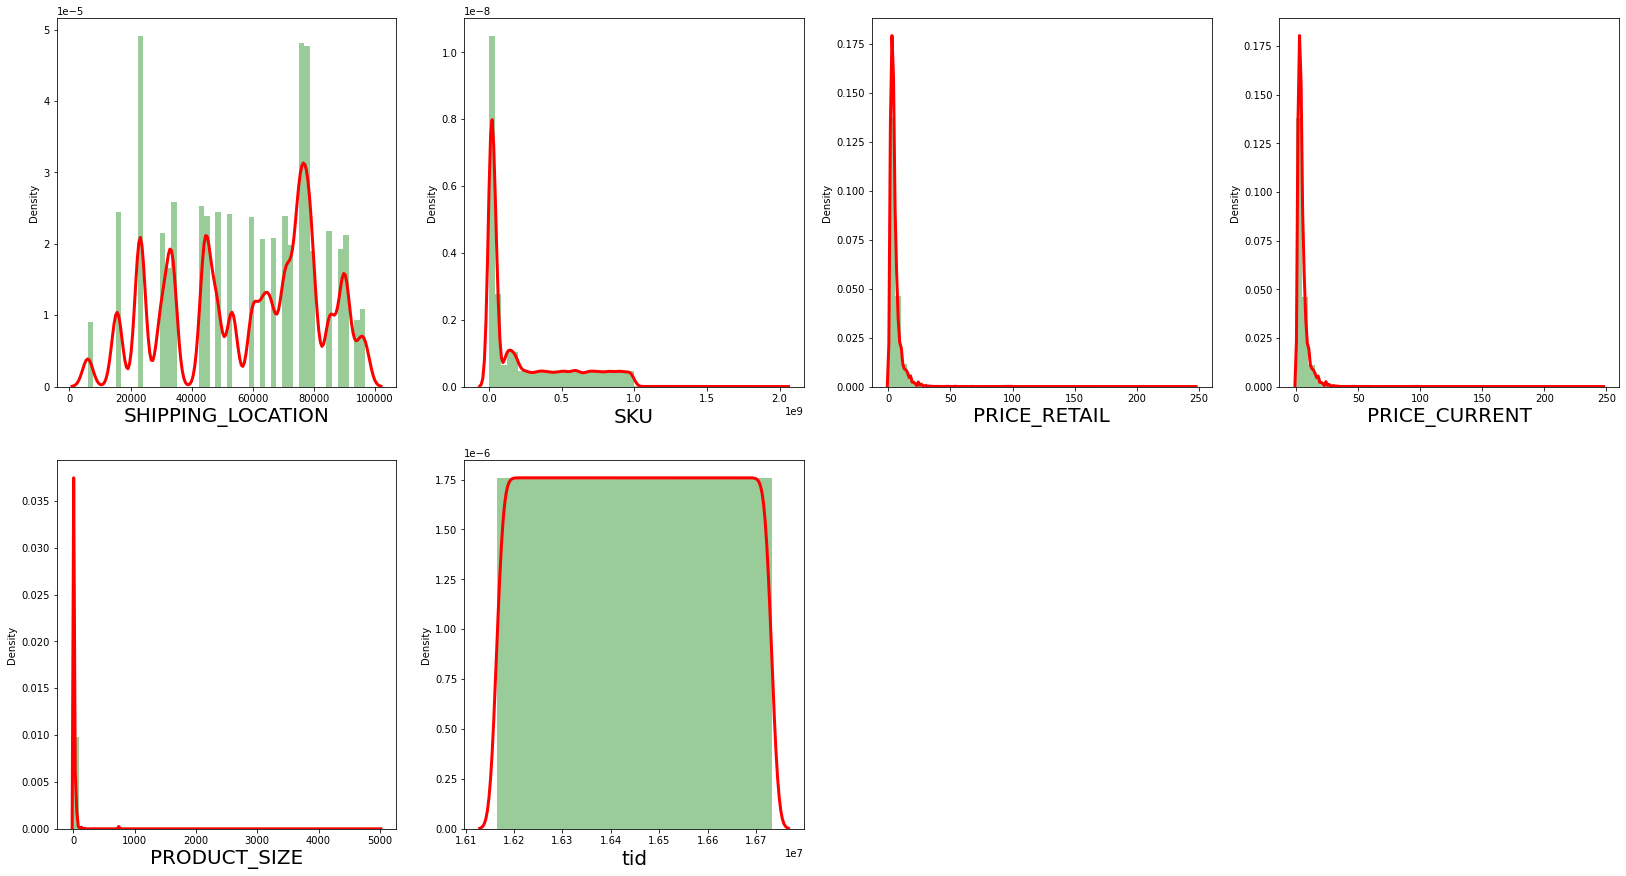

In [21]:
plt.figure(figsize=(28,80))
plotnumber=1
for i in numeric_columns.columns:
    ax=plt.subplot(10,4,plotnumber)
    sns.distplot(x=numeric_columns[i], color = 'g',    kde_kws={"color": "r", "lw": 3, "label": "KDE"})
#     plt.title(i)
    plt.xlabel(i, size = 20)
#     plt.xticks(rotation=70)
    plotnumber+=1
plt.show()


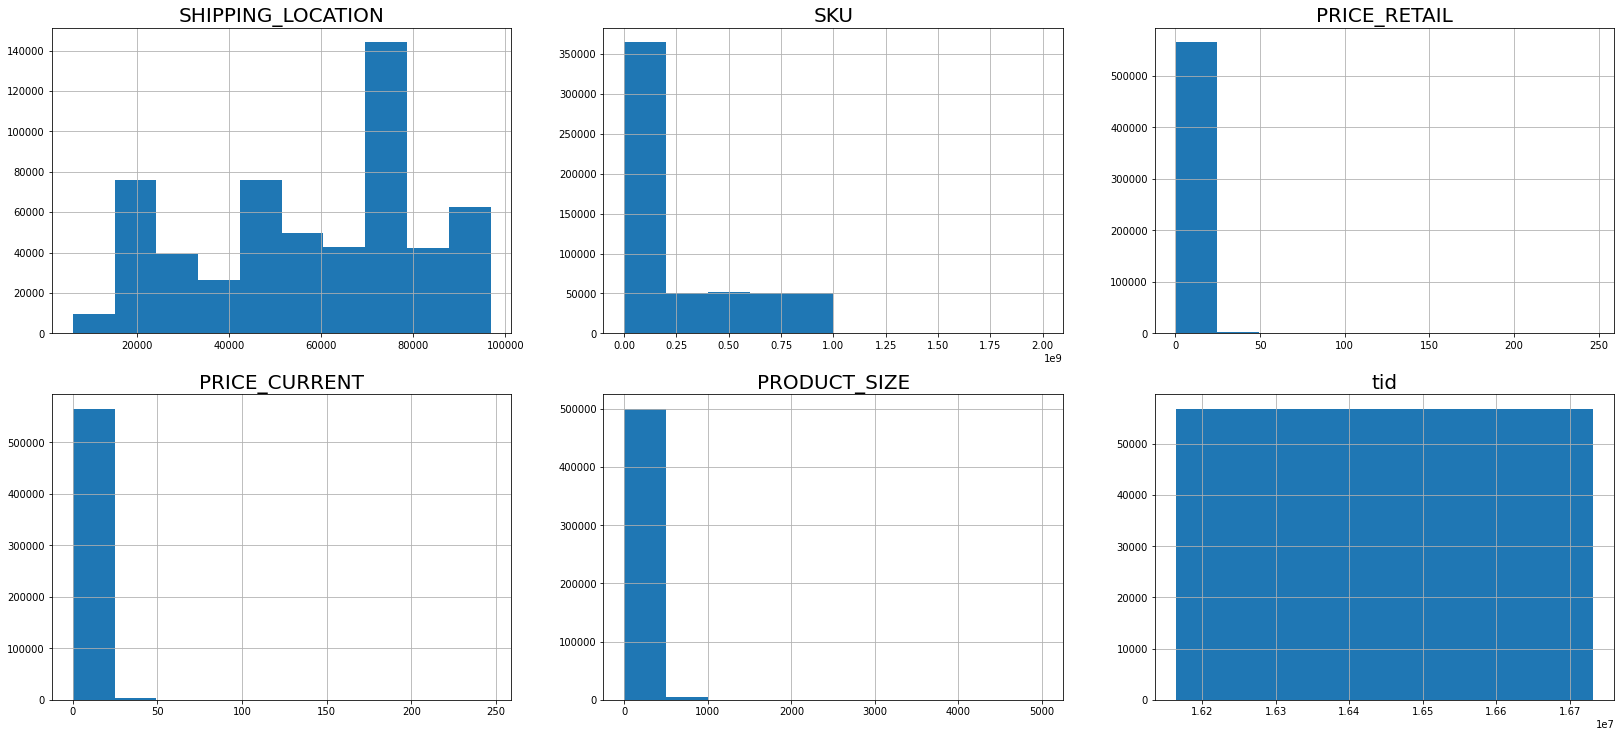

In [22]:
plt.figure(figsize=(28,100))
plotnumber=1
for i in numeric_columns.columns:
    ax=plt.subplot(15,3,plotnumber)
    numeric_columns[i].hist() 
    
    plt.title(i,size=20)
    plotnumber+=1
plt.show() 
 

In [23]:
values=df.DEPARTMENT.value_counts() 
total=values.sum()
values=(values*100)/total

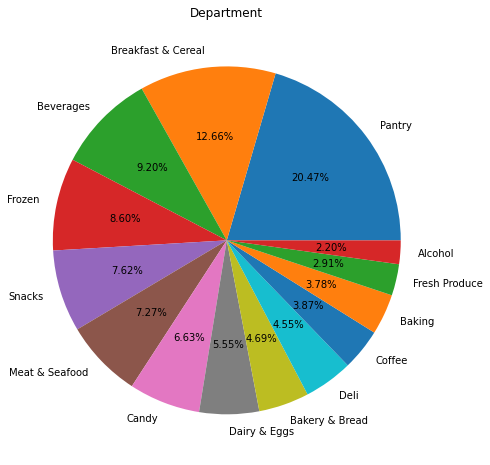

In [24]:
plt.rcParams['figure.figsize'] = (8, 8)
values.plot.pie(  autopct = '%.2f%%')
plt.title("Department")
plt.axis('off')
plt.show() 



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

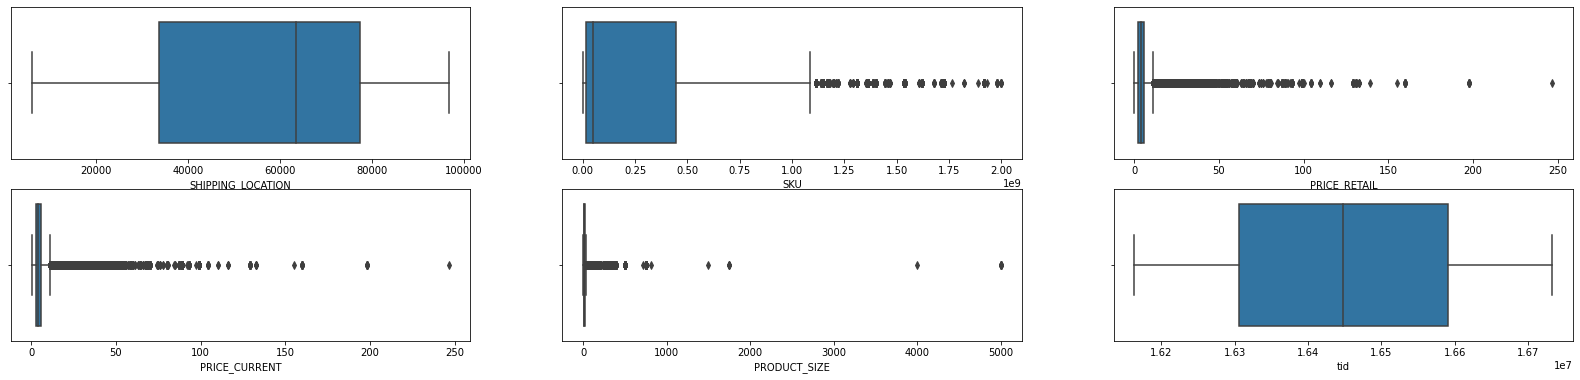

In [25]:
plt.figure(figsize=(28,100))
plotnumber=1
for i in numeric_columns.columns:
    ax=plt.subplot(30,3,plotnumber)
    sns.boxplot(numeric_columns[i])
#     plt.title(i,size=20)
    plt.xlabel(i )
#     plt.xticks(rotation=70, size = 15)
    plotnumber+=1
plt.show() 

In [26]:
top_sellers = df.groupby('BRAND')['BRAND'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)

,count
BRAND,
Great Value,80387
Freshness Guaranteed,17815
Marketside,15772
PRODUCE UNBRANDED,8643
Kraft,4561
Starbucks,4441
Hershey's,4302
Hormel,3879
Pillsbury,3784


In [27]:
df.head(5)

,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,RunDate,tid
0,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",110895339,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Red Pepper Hummus, 10 Oz",Marketside,2.67,2.67,10.0,2022-09-11 21:20:04,16163804
1,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",105455228,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Garlic Hummus, 10 Oz",Marketside,2.67,2.67,10.0,2022-09-11 21:20:04,16163805
2,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",128642379,https://www.walmart.com/ip/Marketside-Classic-...,"Marketside Classic Hummus, 10 Oz",Marketside,2.67,2.67,10.0,2022-09-11 21:20:04,16163806
3,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",366126367,https://www.walmart.com/ip/Marketside-Everythi...,"Marketside Everything Hummus, 10 oz",Marketside,2.67,2.67,10.0,2022-09-11 21:20:04,16163807
4,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",160090316,https://www.walmart.com/ip/Price-s-Jalapeno-Di...,"Price's Jalapeno Dip, 12 Oz.",Price's,3.12,3.12,12.0,2022-09-11 21:20:04,16163808


In [28]:
df

,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,RunDate,tid
0,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",110895339,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Red Pepper Hummus, 10 Oz",Marketside,2.67,2.67,10.0,2022-09-11 21:20:04,16163804
1,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",105455228,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Garlic Hummus, 10 Oz",Marketside,2.67,2.67,10.0,2022-09-11 21:20:04,16163805
2,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",128642379,https://www.walmart.com/ip/Marketside-Classic-...,"Marketside Classic Hummus, 10 Oz",Marketside,2.67,2.67,10.0,2022-09-11 21:20:04,16163806
3,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",366126367,https://www.walmart.com/ip/Marketside-Everythi...,"Marketside Everything Hummus, 10 oz",Marketside,2.67,2.67,10.0,2022-09-11 21:20:04,16163807
4,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",160090316,https://www.walmart.com/ip/Price-s-Jalapeno-Di...,"Price's Jalapeno Dip, 12 Oz.",Price's,3.12,3.12,12.0,2022-09-11 21:20:04,16163808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568529,70072,Alcohol,Wine,White Wine,Alcohol/Wine,593600139,https://www.walmart.com/ip/Farm-Fresh-Blueberr...,Farm Fresh Blueberry Moscato 750ml,Farm Fresh Wine Company,9.98,9.98,750.0,2022-09-11 21:20:04,16732333
568530,70072,Alcohol,Wine,White Wine,Alcohol/Wine,333403243,https://www.walmart.com/ip/Farm-Fresh-Peach-Mo...,Farm Fresh Peach Moscato 750 Ml,Farm Fresh Wine Company,9.98,9.98,750.0,2022-09-11 21:20:04,16732334
568531,70072,Alcohol,Wine,White Wine,Alcohol/Wine,526588325,https://www.walmart.com/ip/Farm-Fresh-Raspberr...,Farm Fresh Raspberry Moscato 750ml,Farm Fresh Wine Company,9.98,9.98,750.0,2022-09-11 21:20:04,16732335
568532,70072,Alcohol,Wine,White Wine,Alcohol/Wine,286992782,https://www.walmart.com/ip/Farm-Fresh-Mango-Mo...,Farm Fresh Mango Moscato 750ml,Farm Fresh Wine Company,9.98,9.98,750.0,2022-09-11 21:20:04,16732336


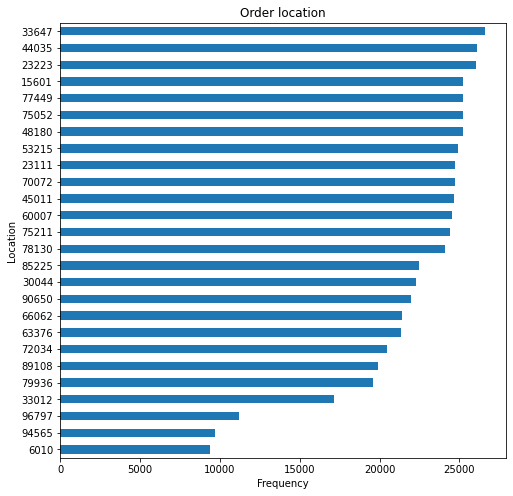

In [29]:
df.SHIPPING_LOCATION.value_counts().sort_values().plot(kind='barh' )
plt.title("Order location")
plt.ylabel("Location")
plt.xlabel("Frequency") 
plt.show()

In [30]:
df.PRODUCT_NAME.value_counts().head(20)
    
names=['','','','','','','','','','','']

<AxesSubplot:>

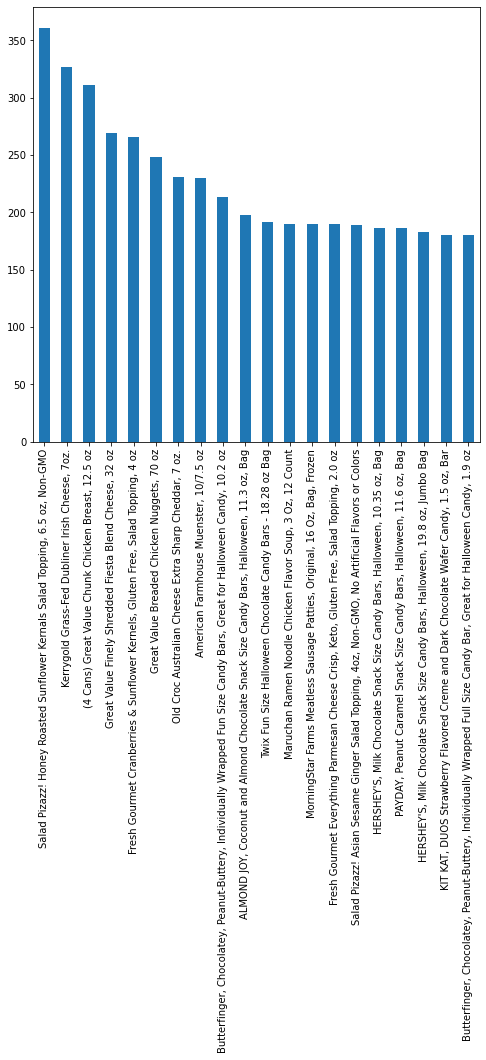

In [31]:
df.PRODUCT_NAME.value_counts().head(20).plot.bar()